In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# setup disply parameters
from matplotlib import pylab as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
float_formatter = StrMethodFormatter('{x:0.03f}')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(18, 6)) # set figure size
plt.rc("animation", html="html5")
import random
random.seed(345)
import numpy as np
np.random.seed(345)
from rich import print

In [2]:
from pathlib import Path

## The tutorial starts here

### Running a tournament

In [3]:
from anl.anl2024 import anl2024_tournament
from negmas.helpers.strings import unique_name

In [4]:
results = anl2024_tournament(
    n_scenarios=4, n_outcomes=100, plot_fraction=0.01, verbosity=0, path=None
)

Output()

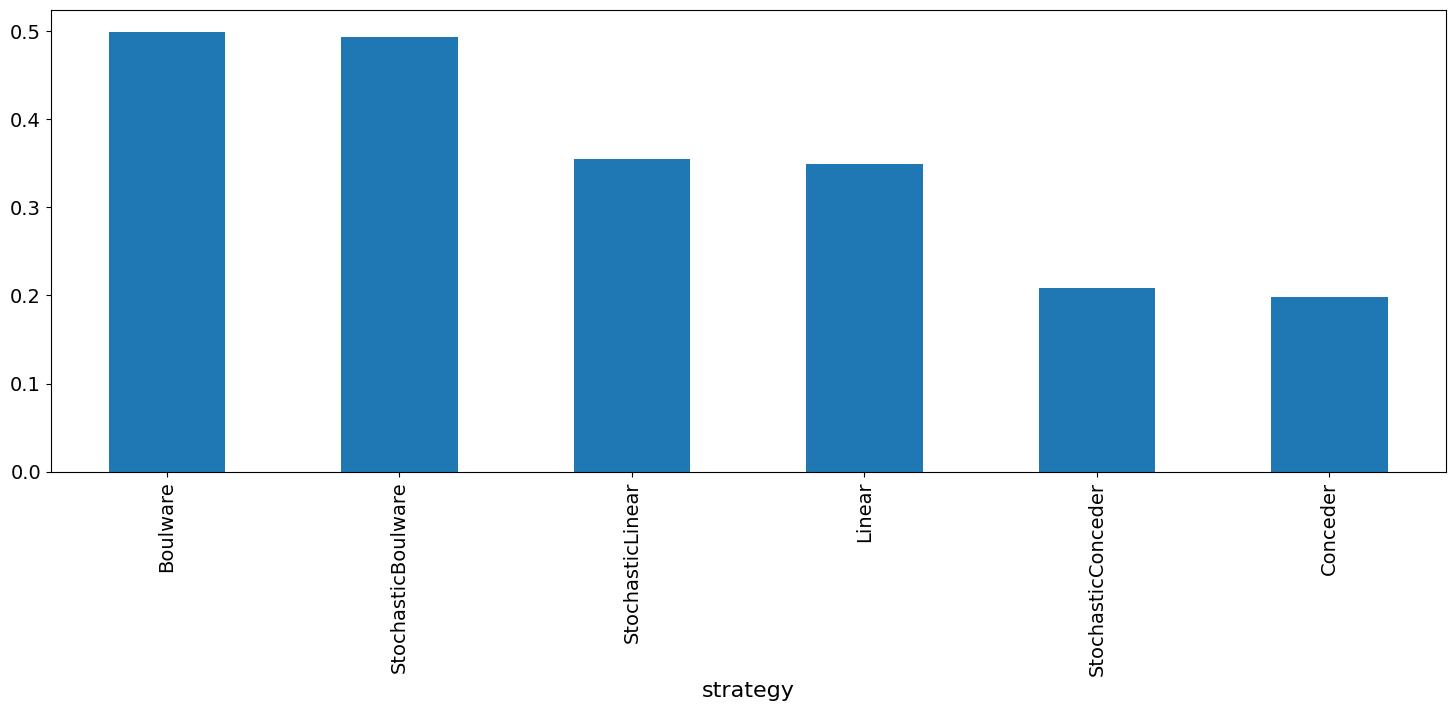

In [5]:
results.final_scores.plot(kind="bar");

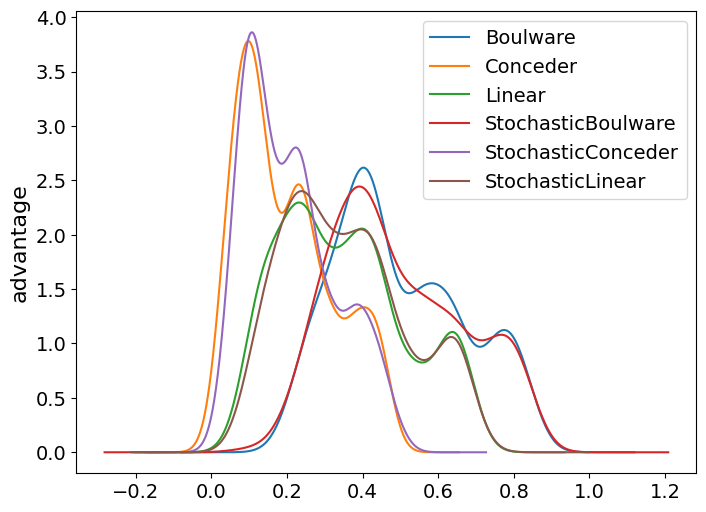

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
df = results.scores
for label, data in df.groupby('strategy'):
    data.advantage.plot(kind="kde", ax=ax, label=label)
plt.ylabel("advantage")
plt.legend();

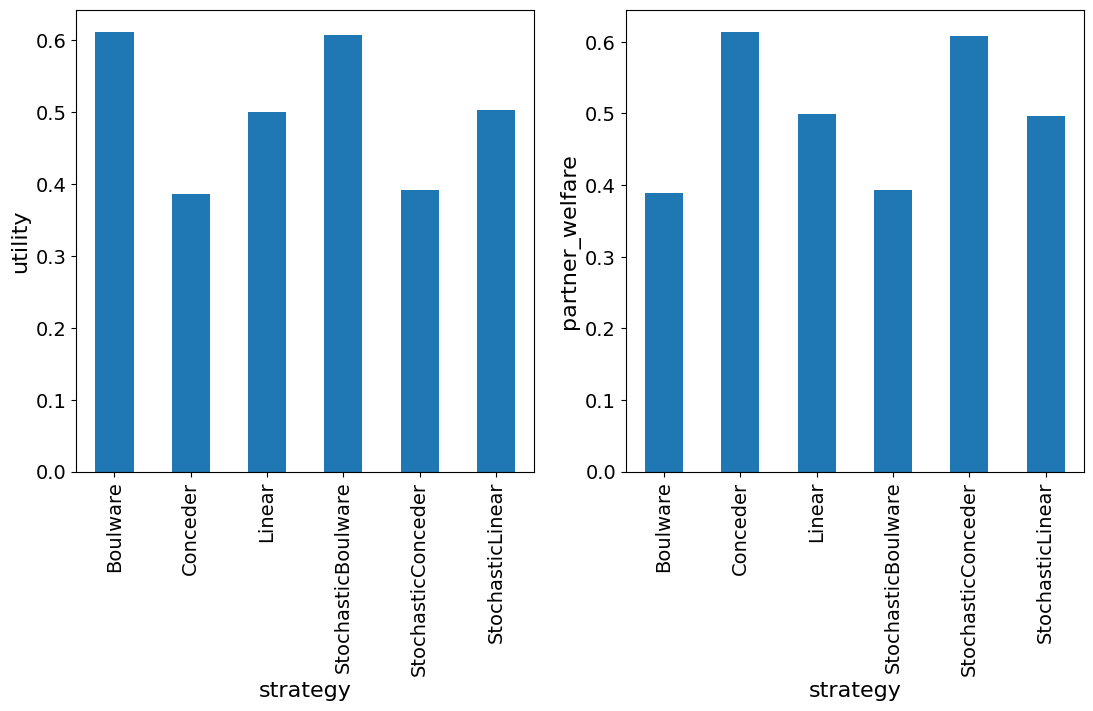

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(13,6))
for i, col in enumerate(["utility", "partner_welfare"]):
    results.scores.groupby("strategy")[col].mean().sort_index().plot(kind="bar", ax=axs[i])
    axs[i].set_ylabel(col)